# <span style="color:blue"> INCOME CENSUS DATA CLASSIFICATION WITH GRADIENT BOOSTING ALGORITHMS</span> 


# DATA PREPROCESSING


In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 


In [2]:
data=pd.read_csv("/kaggle/input/adult-census-income/adult.csv")
df=data.copy() 
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.rename({"education.num":"educational-num","marital.status":"marital-status","sex":"gender","capital.gain":"capital-gain","capital.loss":"capital-loss",
         "hours.per.week":"hours-per-week","native.country":"native-country"},axis=1,inplace=True)

In [4]:
print("Rows : {} \nColumns : {}".format(df.shape[0],df.shape[1]))

Rows : 32561 
Columns : 15


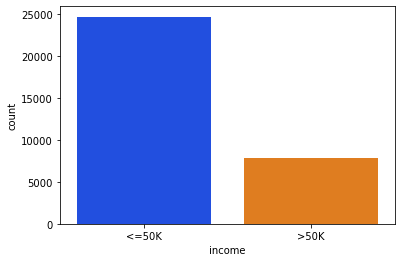

In [5]:
sns.countplot(df["income"],palette="bright")

In [6]:
numeric_describe=df.describe().T 
numeric_describe  

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
educational-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
object_describe=df.describe(include=["object"]).T 
object_describe

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
gender,32561,2,Male,21790
native-country,32561,42,United-States,29170
income,32561,2,<=50K,24720


In [8]:
object_columns=df.select_dtypes(include=["object"]).columns 
for i in range(len(object_columns)):
    print("----- {}-----".format(object_columns[i]))
    print(df[object_columns[i]].value_counts()) 

----- workclass-----
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----- education-----
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
----- marital-status-----
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64
----- occupation-----
Prof-special

In [9]:
df.isnull().sum() 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
df=df.replace("?",np.nan) 

In [11]:
df.isnull().sum() 

age                   0
workclass          1836
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1843
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income                0
dtype: int64

In [12]:
nan_percentage = df.isna().sum() * 100 / len(df)
missing_percentage_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': nan_percentage}).reset_index(drop=True)
missing_percentage_df

,column_name,percent_missing
0,age,0.000000
1,workclass,5.638647
2,fnlwgt,0.000000
3,education,0.000000
4,educational-num,0.000000
5,marital-status,0.000000
6,occupation,5.660146
7,relationship,0.000000
8,race,0.000000
9,gender,0.000000


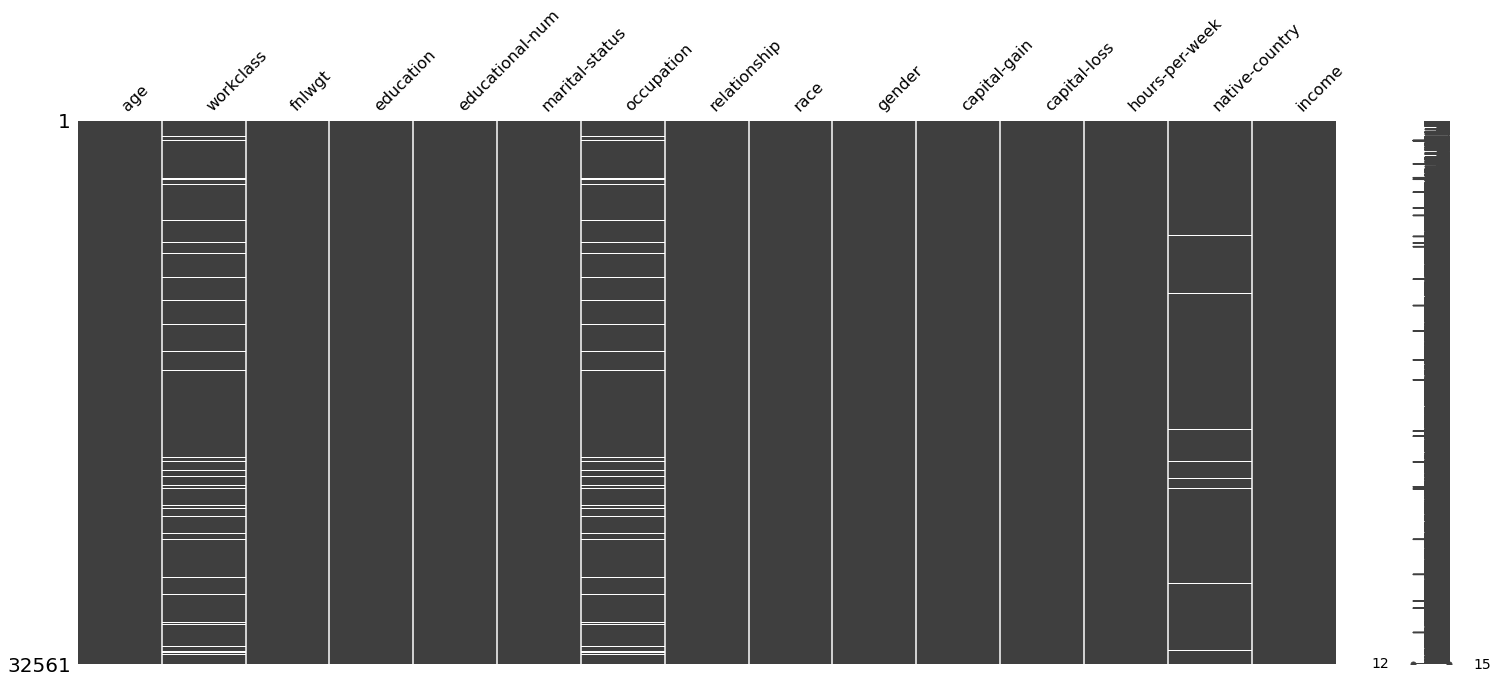

In [13]:
msno.matrix(df) 

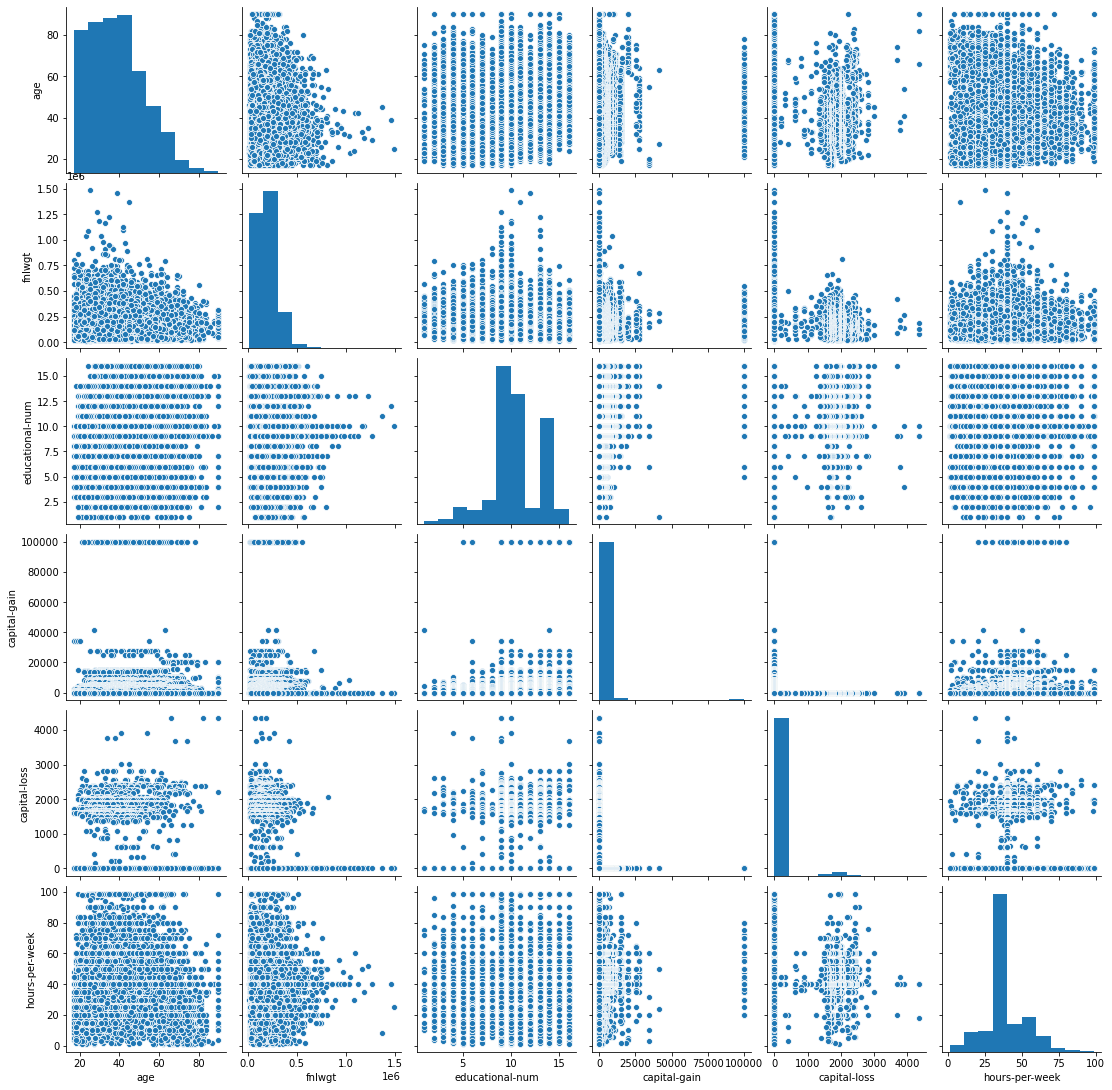

In [14]:
sns.pairplot(df) 

In [15]:
#sns.pairplot(df,hue="income",palette="bright")

In [16]:
df.dtypes 

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [17]:
df["education"].value_counts() 

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [18]:
df["educational-num"].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: educational-num, dtype: int64

In [19]:
df.drop("education",axis=1,inplace=True) 

In [20]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,NaN,77053,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [21]:
from pandas.api.types import CategoricalDtype  
df["educational-num"]=df["educational-num"].astype(CategoricalDtype(ordered=True)) 
df["educational-num"].head()

0     9
1     9
2    10
3     4
4    10
Name: educational-num, dtype: category
Categories (16, int64): [1 < 2 < 3 < 4 ... 13 < 14 < 15 < 16]

In [22]:
df["educational-num"].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: educational-num, dtype: int64

In [23]:
df.dtypes

age                   int64
workclass            object
fnlwgt                int64
educational-num    category
marital-status       object
occupation           object
relationship         object
race                 object
gender               object
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country       object
income               object
dtype: object

In [24]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,NaN,77053,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [25]:
df.corr() 

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


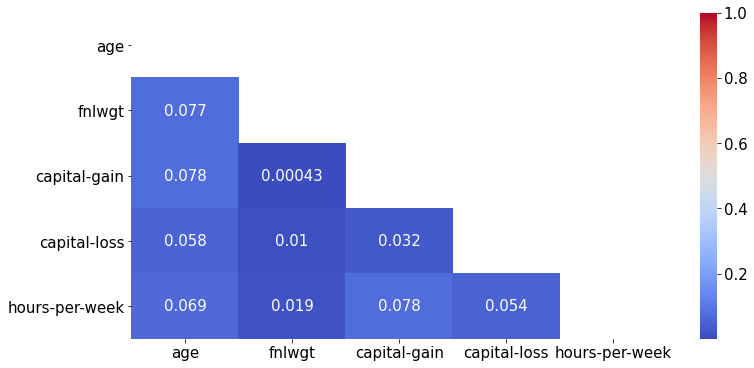

In [26]:
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 15})
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask) 

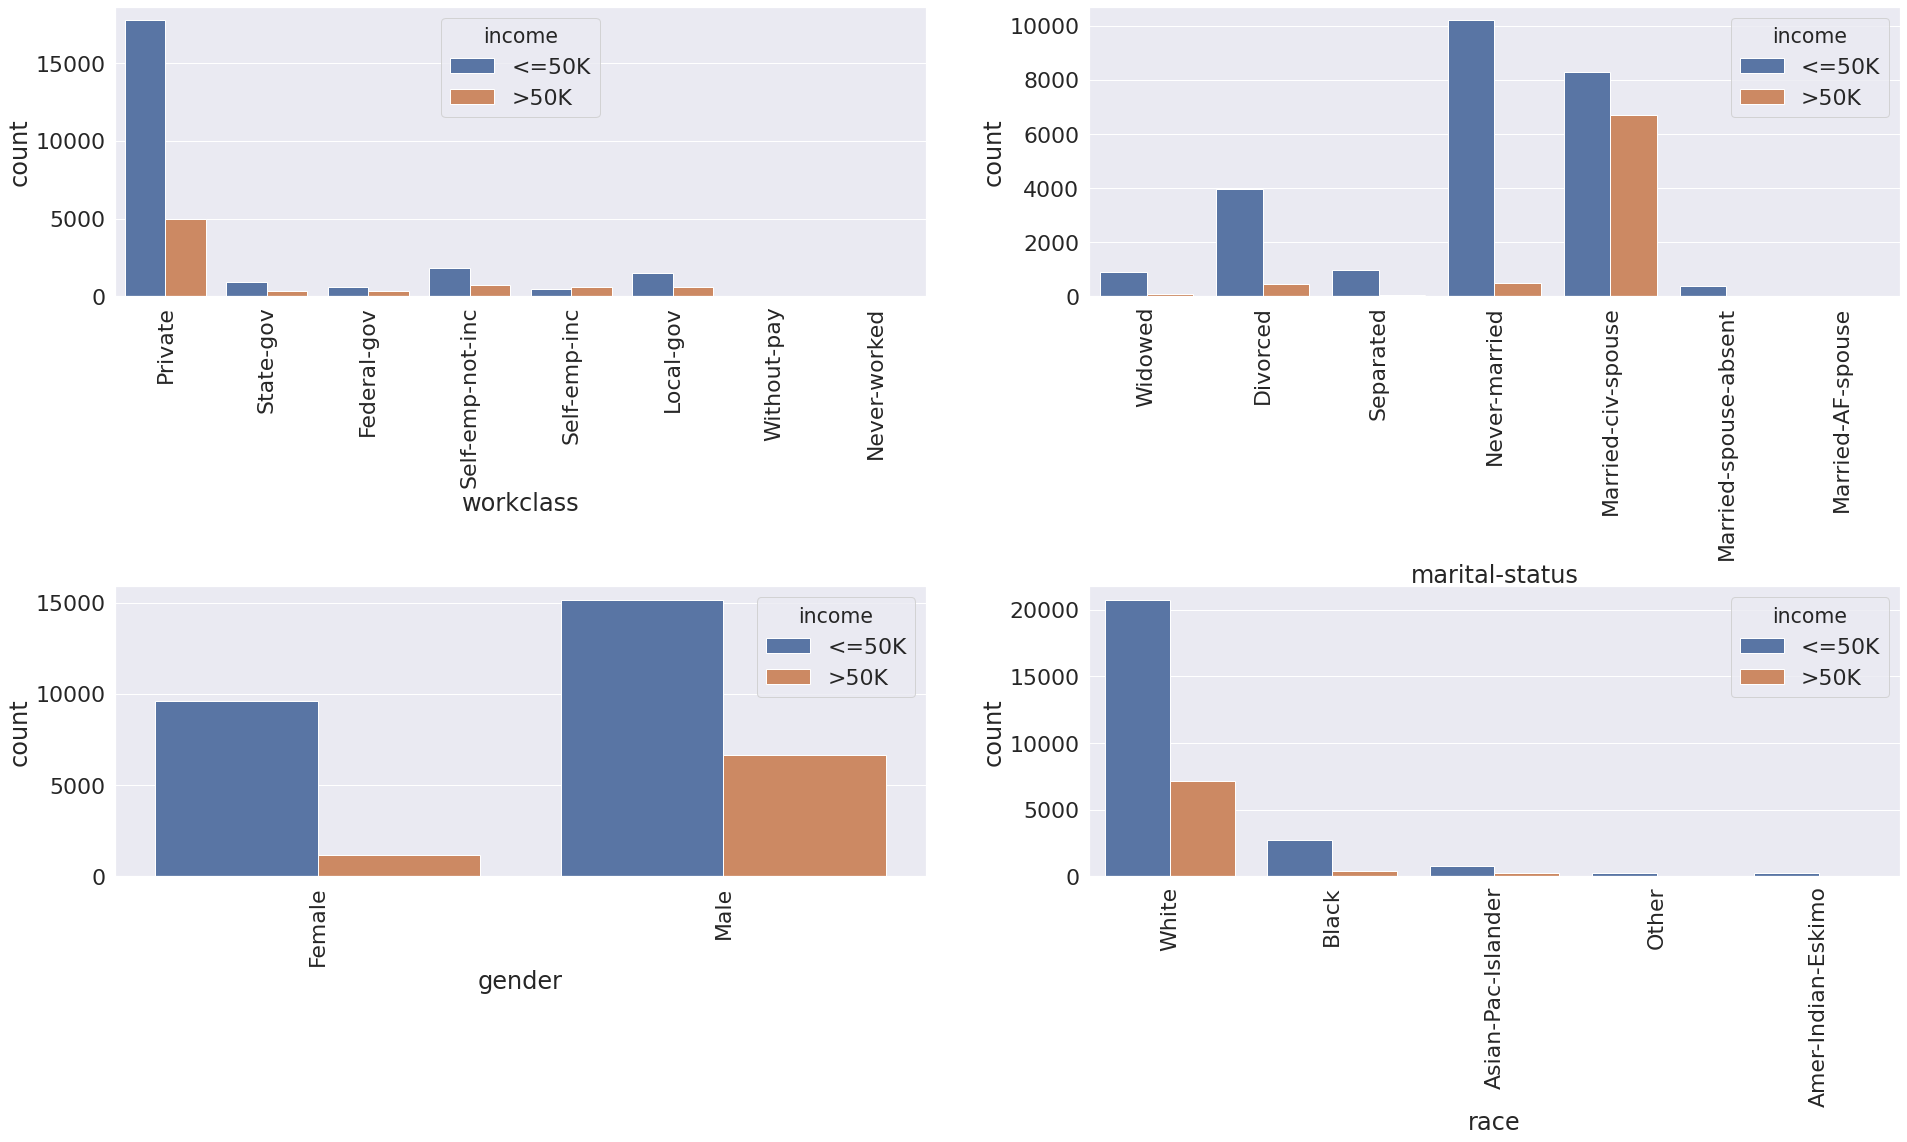

In [27]:
sns.set(font_scale=2)
plt.figure(figsize=(32,16)) 
#plt.rcParams.update({'font.size': 20}) 
plt.subplot(221)
sns.countplot(df["workclass"],hue=df["income"])
plt.xticks(rotation=90) 

plt.subplot(222)
sns.countplot(df["marital-status"],hue=df["income"])
plt.xticks(rotation=90)

plt.subplot(223)
sns.countplot(df["gender"],hue=df["income"])
plt.xticks(rotation=90)

plt.subplot(224)
sns.countplot(df["race"],hue=df["income"])
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=1) 
plt.show()

## HANDLING WITH OUTLIERS

In [28]:
df.skew() 

age                 0.558743
fnlwgt              1.446980
educational-num    -0.311676
capital-gain       11.953848
capital-loss        4.594629
hours-per-week      0.227643
dtype: float64

In [29]:
df.kurtosis() 

age                 -0.166127
fnlwgt               6.218811
educational-num      0.623444
capital-gain       154.799438
capital-loss        20.376802
hours-per-week       2.916687
dtype: float64

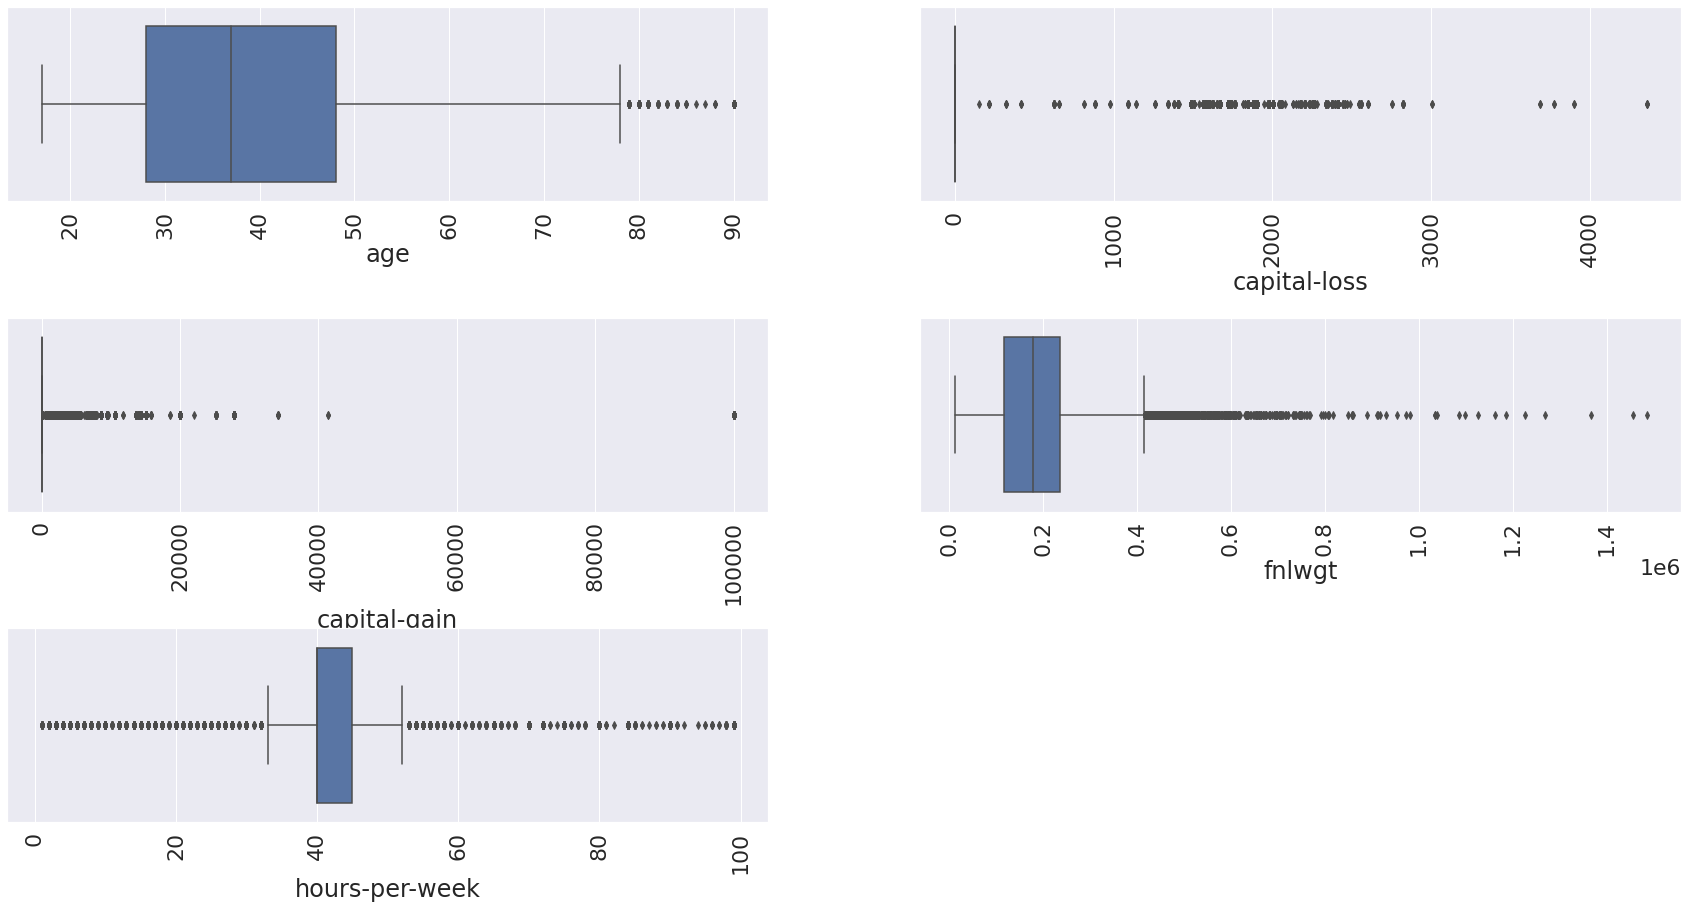

In [30]:

plt.figure(figsize=(30,15))
plt.rcParams.update({'font.size': 20})
plt.subplot(321)
sns.boxplot(df["age"])
plt.xticks(rotation=90) 

plt.subplot(322)
sns.boxplot(df["capital-loss"])
plt.xticks(rotation=90)

plt.subplot(323)
sns.boxplot(df["capital-gain"])
plt.xticks(rotation=90)

plt.subplot(324)
sns.boxplot(df["fnlwgt"])
plt.xticks(rotation=90)

plt.subplot(325)
sns.boxplot(df["hours-per-week"])
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.6) 
plt.show()

In [31]:
df_loss_withoutzero=df.loc[df["capital-loss"]!=0,:] 
df_loss_withoutzero.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,NaN,77053,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [32]:
df_gain_withoutzero=df.loc[df["capital-gain"]!=0,:] 
df_gain_withoutzero.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1519,54,Self-emp-inc,166459,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1520,52,Private,152234,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1521,53,Self-emp-inc,263925,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1522,52,Private,118025,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1523,46,Private,370119,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 7 Text major ticklabel objects>)

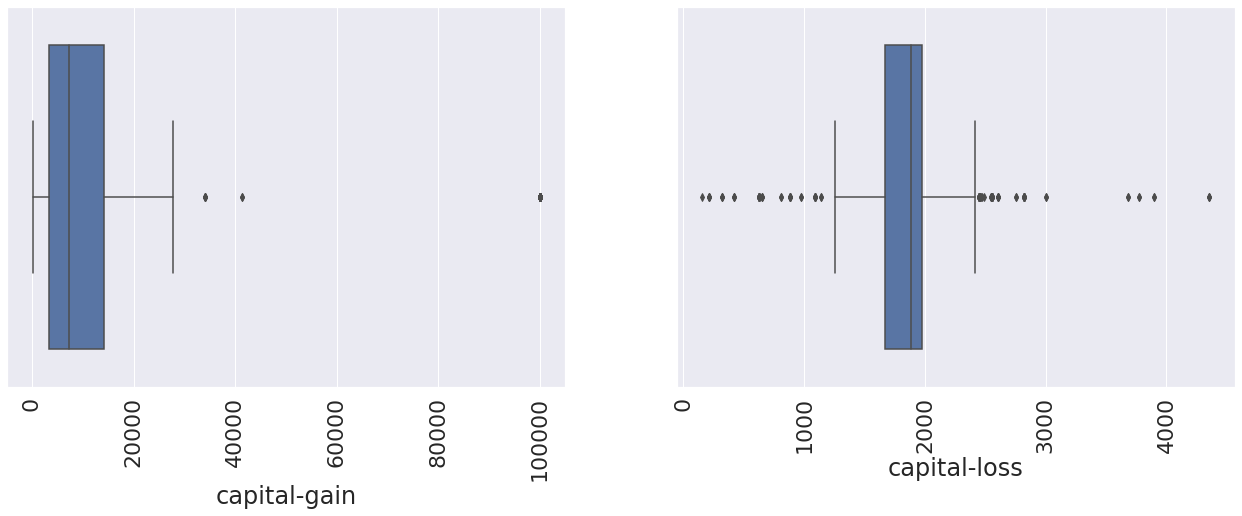

In [33]:

plt.figure(figsize=(22,7))

plt.subplot(121)
sns.boxplot(df_gain_withoutzero["capital-gain"])
plt.xticks(rotation=90) 

plt.subplot(122)
sns.boxplot(df_loss_withoutzero["capital-loss"])
plt.xticks(rotation=90)

In [34]:
numeric_columns=list(df.select_dtypes(include=["int64"]).columns) 
numeric_columns

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

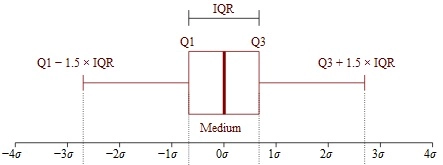


In [35]:
lower_limits=[]
upper_limits=[]
IQR_values=[]

for i in range(len(numeric_columns)):
    
    Q1=df[numeric_columns[i]].quantile(0.25) 
    Q3=df[numeric_columns[i]].quantile(0.75) 
    IQR=Q3-Q1 
    IQR_values.append(IQR)
    lower_limit=Q1-(1.5*IQR) 
    lower_limits.append(lower_limit)
    upper_limit=Q3+1.5*IQR 
    upper_limits.append(upper_limit)

In [36]:
IQR_table=pd.DataFrame({"numeric_columns":numeric_columns,"lower_limits":lower_limits,
                        "upper_limits":upper_limits,"IQR_values":IQR_values})
IQR_table 

,numeric_columns,lower_limits,upper_limits,IQR_values
0,age,-2.0,78.0,20.0
1,fnlwgt,-61009.0,415887.0,119224.0
2,capital-gain,0.0,0.0,0.0
3,capital-loss,0.0,0.0,0.0
4,hours-per-week,32.5,52.5,5.0


In [37]:
Q1_loss=df[df["capital-loss"]!=0]["capital-loss"].quantile(0.25)
Q3_loss=df[df["capital-loss"]!=0]["capital-loss"].quantile(0.75)
IQR_loss=Q3_loss-Q1_loss
lower_limit_loss=Q1_loss-(1.5*IQR_loss)
upper_limit_loss=Q3_loss+(1.5*IQR_loss)

print("Capital-Loss Lower Limit :",lower_limit_loss)
print("Capital-Loss Upper Limit :",upper_limit_loss)

Capital-Loss Lower Limit : 1214.5
Capital-Loss Upper Limit : 2434.5


In [38]:
Q1_gain=df[df["capital-gain"]!=0]["capital-gain"].quantile(0.25)
Q3_gain=df[df["capital-gain"]!=0]["capital-gain"].quantile(0.75)
IQR_gain=Q3_gain-Q1_gain
lower_limit_gain=Q1_gain-(1.5*IQR_gain)
upper_limit_gain=Q3_gain+(1.5*IQR_gain)

print("Capital-Gain için Lower Limit :",lower_limit_gain)
print("Capital-Gain için Upper Limit:",upper_limit_gain)

Capital-Gain için Lower Limit : -12598.5
Capital-Gain için Upper Limit: 30093.5


In [39]:
df_loss_withoutzero[(df_loss_withoutzero["capital-loss"]<lower_limit_loss )|( df_loss_withoutzero["capital-loss"]>upper_limit_loss)]["capital-loss"].shape

(107,)

In [40]:
df_gain_withoutzero[(df_gain_withoutzero["capital-gain"]<lower_limit_gain )|( df_gain_withoutzero["capital-gain"]>upper_limit_gain)]["capital-gain"].shape

(166,)

In [41]:
df_gain_withoutzero["capital-gain"].mode()[0] 

15024

In [42]:
df_loss_withoutzero["capital-loss"].mode()[0]

1902

In [43]:
df[((df["capital-gain"]!=0 )& (df["capital-gain"]<lower_limit_gain )) | ((df["capital-gain"]!=0 )& (df["capital-gain"]>upper_limit_gain ))].head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1519,54,Self-emp-inc,166459,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1520,52,Private,152234,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1521,53,Self-emp-inc,263925,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1522,52,Private,118025,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1523,46,Private,370119,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K


In [44]:
outlier_gain=((df["capital-gain"]!=0 )& (df["capital-gain"]<lower_limit_gain )) | ((df["capital-gain"]!=0 )& (df["capital-gain"]>upper_limit_gain ))

In [45]:
outlier_loss=((df["capital-loss"]!=0 )& (df["capital-loss"]<lower_limit_loss)) | ((df["capital-loss"]!=0 )& (df["capital-loss"]>upper_limit_loss ))

In [46]:
df.loc[outlier_gain,"capital-gain"]=df_gain_withoutzero["capital-gain"].mode()[0]

In [47]:
df.loc[outlier_loss,"capital-loss"]=df_loss_withoutzero["capital-loss"].mode()[0]

In [48]:
print("outlier number for age: {}".format(df[(df["age"]<(lower_limits[0]))|(df["age"]>(upper_limits[0]))].shape[0]))

outlier number for age: 143


In [49]:
print("outlier number for hours-per-week : {}".format(df[(df["hours-per-week"]<(lower_limits[4]))|(df["hours-per-week"]>(upper_limits[4]))].shape[0]))

outlier number for hours-per-week : 9008


In [50]:
df.drop(df[df["age"]>upper_limits[0]].index,inplace=True) 

In [51]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,66,NaN,186061,10,Widowed,NaN,Unmarried,Black,Female,0,1902,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,1902,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,1902,40,United-States,<=50K
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,1902,45,United-States,<=50K
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,1902,40,United-States,<=50K


In [52]:
print("Final Weight Outlier Number :{}".format(df[(df["fnlwgt"]<(lower_limits[1]))|(df["fnlwgt"]>(upper_limits[1]))].shape[0]))

Final Weight Outlier Number :991


In [53]:
df.drop(df[df["fnlwgt"]>900000].index,inplace=True) 

In [54]:
numeric_describe

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
educational-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [55]:
numeric_describe_2=df.describe().T

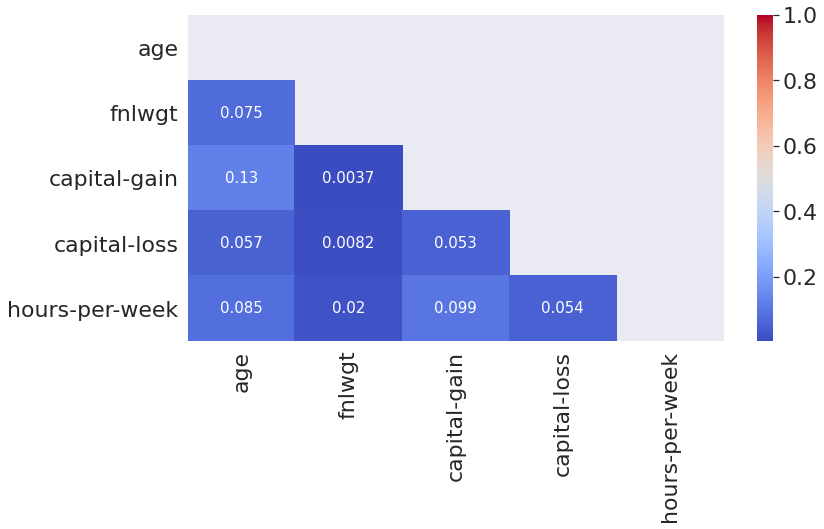

In [56]:
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 15})
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask) 

## HANDLING WITH MISSING VALUES

In [57]:
df.isnull().sum() 

age                   0
workclass          1800
fnlwgt                0
educational-num       0
marital-status        0
occupation         1807
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      580
income                0
dtype: int64

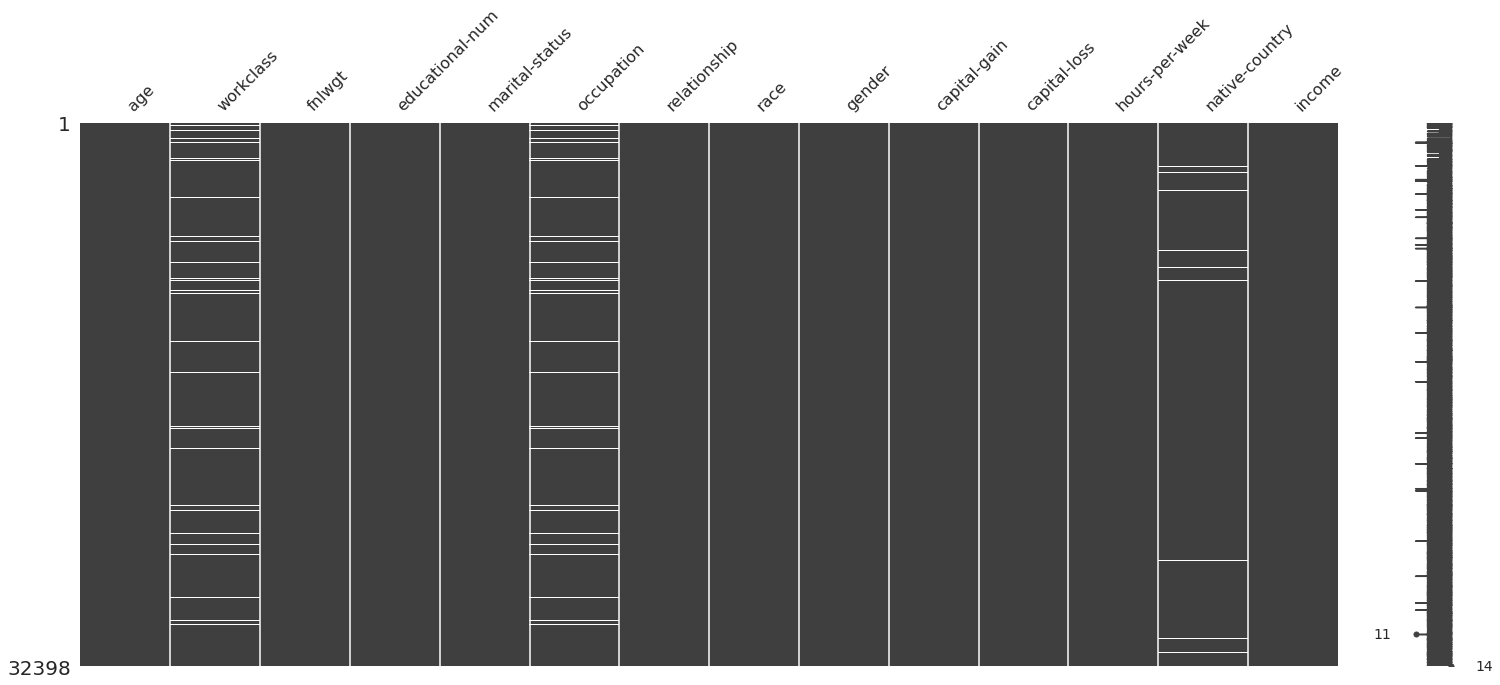

In [58]:
msno.matrix(df)

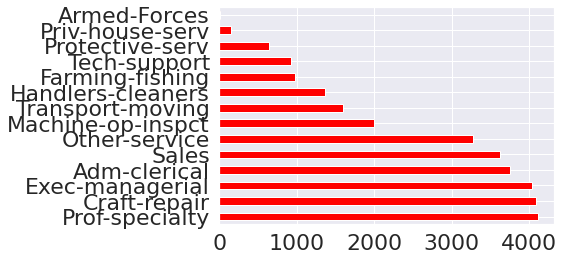

In [59]:
df["occupation"].value_counts().plot.barh(color="red")

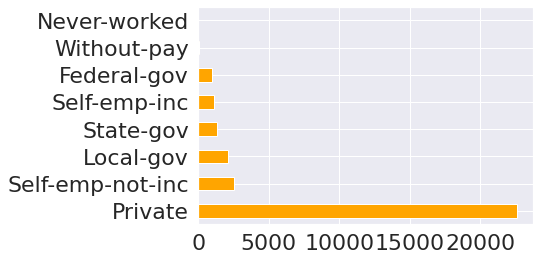

In [60]:
df["workclass"].value_counts().plot.barh(color="orange")

In [61]:
df["native-country"].value_counts()

United-States                 29024
Mexico                          642
Philippines                     197
Germany                         137
Canada                          120
Puerto-Rico                     113
El-Salvador                     105
India                           100
Cuba                             94
England                          89
Jamaica                          81
South                            79
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Columbia                         58
Poland                           57
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [62]:

for i in ["occupation","workclass","native-country"]:
    df[i].fillna(df[i].mode()[0],inplace=True)


In [63]:
df.isnull().sum().sum() 

0

In [64]:
df["occupation"].value_counts()

Prof-specialty       5927
Craft-repair         4093
Exec-managerial      4041
Adm-clerical         3756
Sales                3632
Other-service        3277
Machine-op-inspct    1998
Transport-moving     1593
Handlers-cleaners    1368
Farming-fishing       984
Tech-support          926
Protective-serv       647
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [65]:
df["workclass"].value_counts()

Private             24420
Self-emp-not-inc     2517
Local-gov            2083
State-gov            1295
Self-emp-inc         1105
Federal-gov           957
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [66]:
numeric_describe

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
educational-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [67]:
numeric_describe_2

,count,mean,std,min,25%,50%,75%,max
age,32398.0,38.384592,13.332532,17.0,28.0,37.0,47.00,78.0
fnlwgt,32398.0,189341.510062,103056.141558,12285.0,117847.5,178469.5,236988.75,889965.0
capital-gain,32398.0,655.349898,2693.989598,0.0,0.0,0.0,0.00,27828.0
capital-loss,32398.0,87.256096,397.455240,0.0,0.0,0.0,0.00,2415.0
hours-per-week,32398.0,40.491357,12.297511,1.0,40.0,40.0,45.00,99.0


## HANDLING WITH CATEGORICAL DATA

In [68]:
df.head()
df_new=df.copy()

In [69]:
df_new=pd.get_dummies(df_new,columns=["gender","income"],drop_first=True) 

In [70]:
df_new.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,gender_Male,income_>50K
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,0,1902,40,United-States,0,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,0,1902,40,United-States,0,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,0,1902,40,United-States,0,0
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,0,1902,45,United-States,0,0
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,0,1902,40,United-States,1,0


In [71]:
df_new.rename({"gender_Male":"gender","income_>50K":"income"},axis=1,inplace=True)


In [72]:
df_new=pd.get_dummies(df_new,columns=["workclass","marital-status","occupation","relationship","race","native-country"])

In [73]:
df_new.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,gender,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
2,66,186061,10,0,1902,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,1902,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,1902,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,1902,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,1902,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [74]:
print("New Column Number :",df_new.shape[1])

New Column Number : 89


In [75]:
df_new.columns 


Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'gender', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tec

In [76]:
df_new.shape

(32398, 89)

## SPLITTING DATA AS TRAIN AND TEST

In [77]:
from sklearn.model_selection import train_test_split 

In [78]:
df_new.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,gender,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
2,66,186061,10,0,1902,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,1902,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,1902,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,1902,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,1902,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
df_new["income"].value_counts()

0    24586
1     7812
Name: income, dtype: int64

In [80]:
X=df_new.drop(columns=["income"],axis=1)
X["educational-num"]=X["educational-num"].astype("int") 

In [81]:
y=df_new["income"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42) 

In [83]:
print("X_train row number :",X_train.shape[0])

X_train row number : 21706


In [84]:
print("X_test row number :",X_test.shape[0])

X_test row number : 10692


In [85]:
print("y_train row number :",y_train.shape[0])

y_train row number : 21706


In [86]:
print("y_test row number :",y_test.shape[0])

y_test row number : 10692


## GRADIENT BOOSTING MODEL

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report 
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score
from sklearn.metrics import accuracy_score
gbm=GradientBoostingClassifier()
gbm_model=gbm.fit(X_train,y_train)
y_pred=gbm_model.predict(X_test)

print("GBM  Accuracy Score :",accuracy_score(y_test,y_pred))
print("GBM  Train Score:",    gbm_model.score(X_train,y_train))
print("GBM  f1 score:",       f1_score(y_test,y_pred))

gbm_train_score=gbm_model.score(X_train,y_train)
gbm_accuracy_score=accuracy_score(y_test,y_pred)
gbm_f1_score=f1_score(y_test,y_pred)
gbm_recall_score=recall_score(y_test,y_pred)
gbm_precision_score=precision_score(y_test,y_pred)

GBM  Accuracy Score : 0.8628881406659185
GBM  Train Score: 0.8716944623606376
GBM  f1 score: 0.6808881149325207


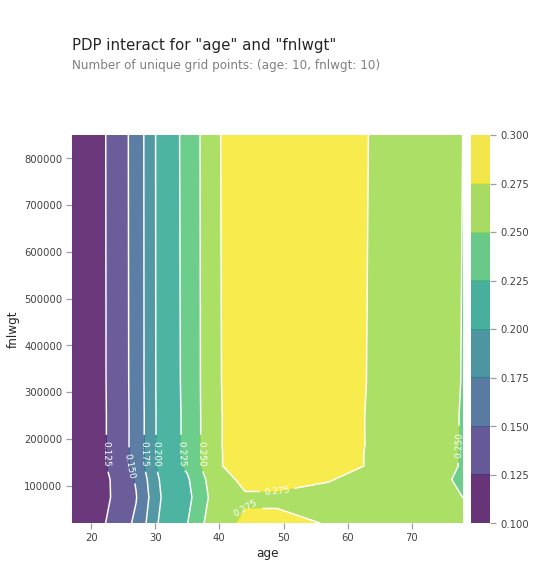

In [88]:

from pdpbox import pdp, get_dataset, info_plots

features_to_plot = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
inter1  =  pdp.pdp_interact(model=gbm_model, dataset=X_test, model_features=X_test.columns, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

In [89]:
import shap
shap.initjs()

In [90]:
gbm_explainer = shap.TreeExplainer(gbm_model)
gbm_shap_values = gbm_explainer.shap_values(X_test)

In [91]:
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values[1,:], X_test.iloc[1,:])

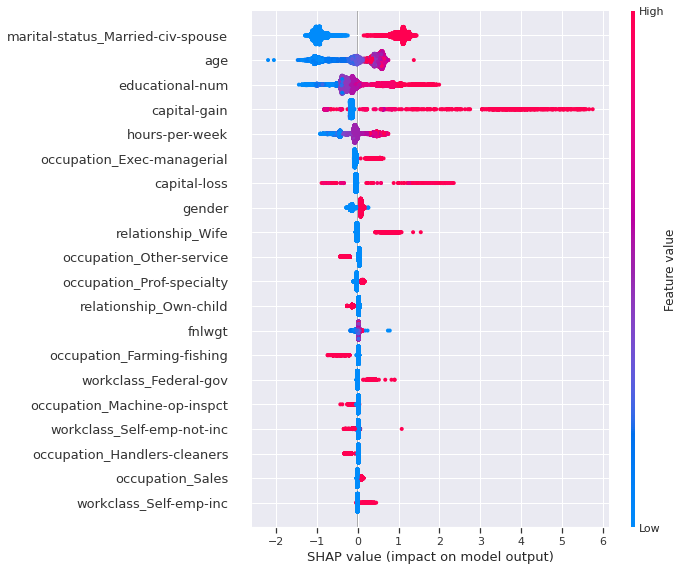

In [92]:
shap.summary_plot(gbm_shap_values, X_test)

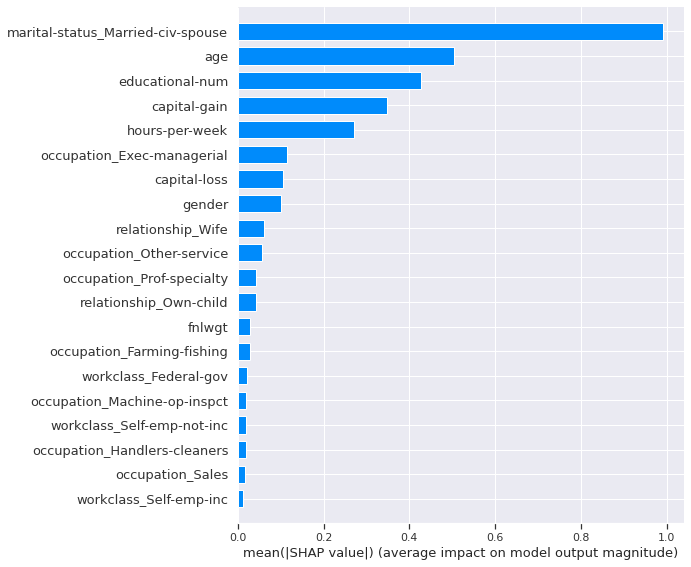

In [93]:
shap.summary_plot(gbm_shap_values,X_test,  plot_type="bar")

In [94]:
gbm_recall_score,gbm_precision_score

(0.6128526645768025, 0.7659157688540646)

In [95]:
gbm_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

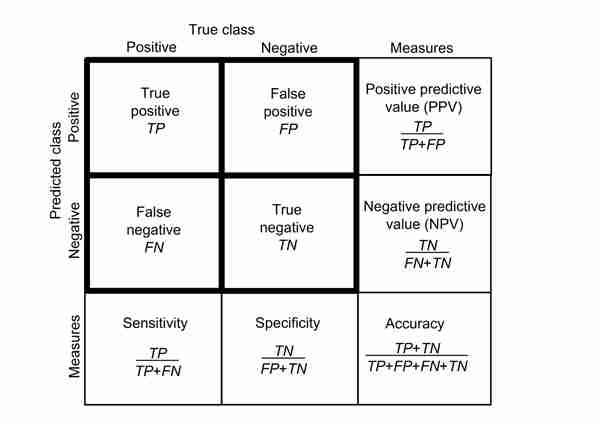

In [96]:
confusion_matrix(y_test,y_pred)

array([[7662,  478],
       [ 988, 1564]])

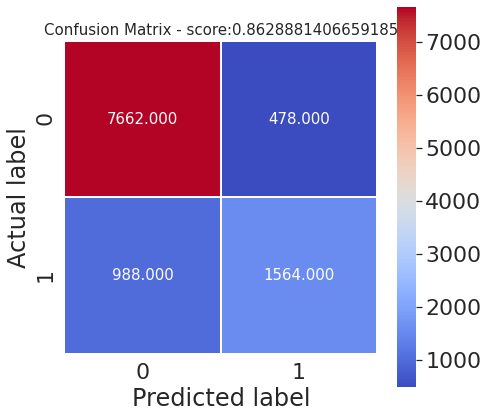

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      8140
           1       0.77      0.61      0.68      2552

    accuracy                           0.86     10692
   macro avg       0.83      0.78      0.80     10692
weighted avg       0.86      0.86      0.86     10692



In [97]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(y_test,y_pred))




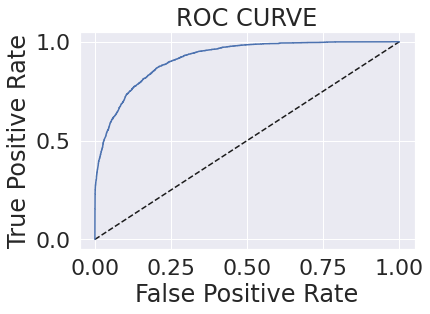

In [98]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], 'k--')                                                     
plt.plot(fpr_mlp, tpr_mlp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.show()

## XGBOOST MODEL

In [99]:
 
from xgboost import XGBClassifier

In [100]:

xgb=XGBClassifier(seed=42)
xgb_model=xgb.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
print("XGBoost  Accuracy Score :",accuracy_score(y_test,y_pred))
print("XGBoost  Train Score:",xgb_model.score(X_train,y_train))
print("XGBoost  f1 score:",f1_score(y_test,y_pred))

xgb_train_score=xgb_model.score(X_train,y_train)
xgb_accuracy_score=accuracy_score(y_test,y_pred)
xgb_f1_score=f1_score(y_test,y_pred)
xgb_recall_score=recall_score(y_test,y_pred)
xgb_precision_score=precision_score(y_test,y_pred)

XGBoost  Accuracy Score : 0.8658810325476992
XGBoost  Train Score: 0.909057403482908
XGBoost  f1 score: 0.7005012531328322


In [101]:
xgb_model 

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

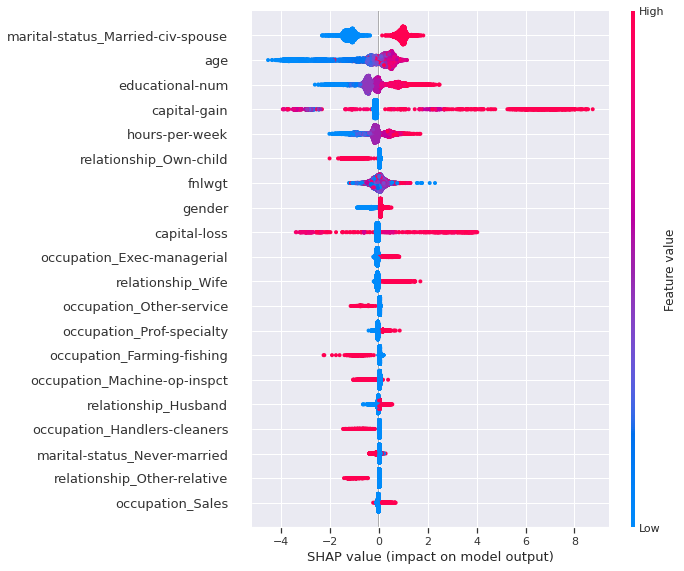

In [102]:
xgb_explainer = shap.TreeExplainer(xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_test)
shap.summary_plot(xgb_shap_values, X_test)

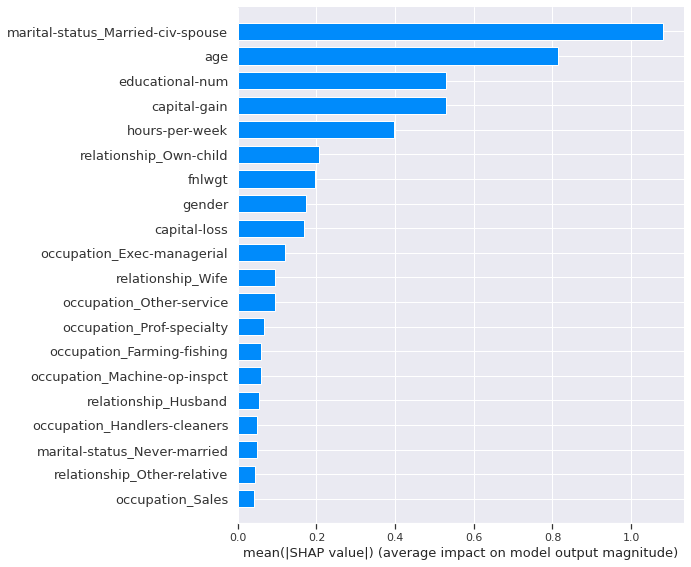

In [103]:
shap.summary_plot(xgb_shap_values,X_test,  plot_type="bar")

In [104]:
confusion_matrix(y_test,y_pred)

array([[7581,  559],
       [ 875, 1677]])

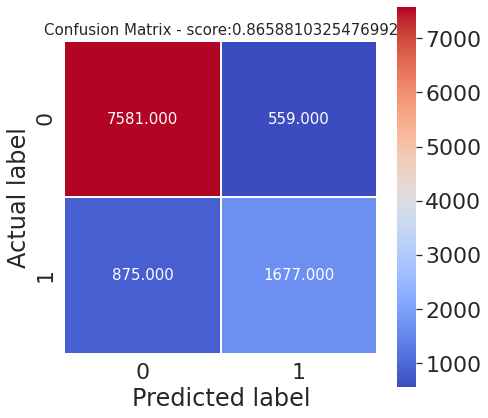

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      8140
           1       0.75      0.66      0.70      2552

    accuracy                           0.87     10692
   macro avg       0.82      0.79      0.81     10692
weighted avg       0.86      0.87      0.86     10692



In [105]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(y_test,y_pred))



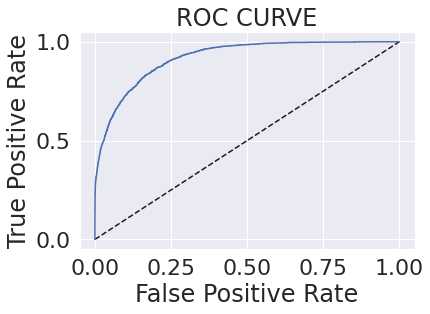

In [106]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], 'k--')                                                     
plt.plot(fpr_mlp, tpr_mlp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.show()


## HISTOGRAM BASED BOOSTING MODEL

In [107]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb=HistGradientBoostingClassifier(random_state=42,)
hgb_model=hgb.fit(X_train,y_train)
y_pred=hgb_model.predict(X_test)
print("Histogram Based Boosting  Accuracy Score:",accuracy_score(y_test,y_pred))
print("Histogram Based Boosting  Train Score:",hgb_model.score(X_train,y_train))
print("Histogram Based Boosting  f1 score:",f1_score(y_test,y_pred))

hgb_train_score=hgb_model.score(X_train,y_train)
hgb_accuracy_score=accuracy_score(y_test,y_pred)
hgb_f1_score=f1_score(y_test,y_pred)
hgb_recall_score=recall_score(y_test,y_pred)
hgb_precision_score=precision_score(y_test,y_pred)

Histogram Based Boosting  Accuracy Score: 0.8692480359147026
Histogram Based Boosting  Train Score: 0.8935317423753801
Histogram Based Boosting  f1 score: 0.7088713036234902


In [108]:
hgb_model

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=None,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=42, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

In [109]:
confusion_matrix(y_test,y_pred)

array([[7592,  548],
       [ 850, 1702]])

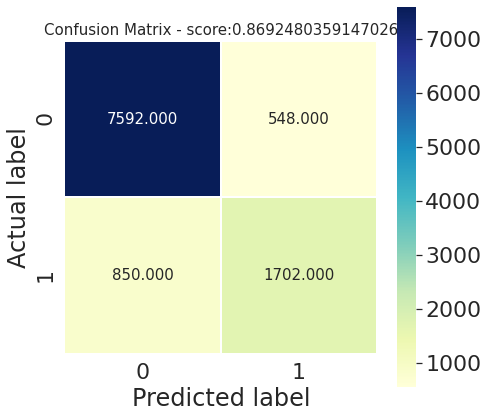

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      8140
           1       0.76      0.67      0.71      2552

    accuracy                           0.87     10692
   macro avg       0.83      0.80      0.81     10692
weighted avg       0.87      0.87      0.87     10692



In [110]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(y_test,y_pred))



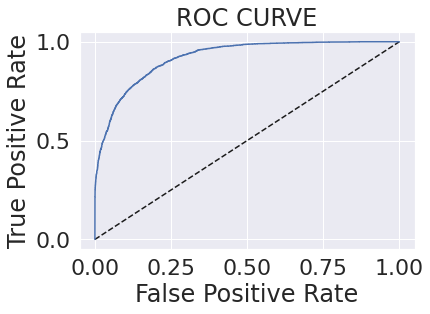

In [111]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, hgb.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_mlp, tpr_mlp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.show()

## LIGHTGBM MODEL

In [112]:
from lightgbm import LGBMClassifier,plot_importance
lgbm=LGBMClassifier(random_state=42)
lgbm_model=lgbm.fit(X_train,y_train)
y_pred=lgbm_model.predict(X_test)

print("LightGBM için Accuracy Score:",accuracy_score(y_test,y_pred))
print("LightGBM için Train Score:",lgbm_model.score(X_train,y_train))
print("LightGBM için f1 score:",f1_score(y_test,y_pred))

lgbm_train_score=lgbm_model.score(X_train,y_train)
lgbm_accuracy_score=accuracy_score(y_test,y_pred)
lgbm_f1_score=f1_score(y_test,y_pred)
lgbm_recall_score=recall_score(y_test,y_pred)
lgbm_precision_score=precision_score(y_test,y_pred)

LightGBM için Accuracy Score: 0.8683127572016461
LightGBM için Train Score: 0.8916889339353175
LightGBM için f1 score: 0.706299541093033


In [113]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [114]:
confusion_matrix(y_test,y_pred)

array([[7591,  549],
       [ 859, 1693]])

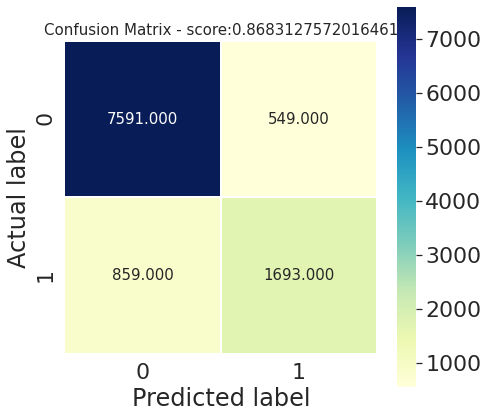

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      8140
           1       0.76      0.66      0.71      2552

    accuracy                           0.87     10692
   macro avg       0.83      0.80      0.81     10692
weighted avg       0.86      0.87      0.87     10692



In [115]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(y_test,y_pred))


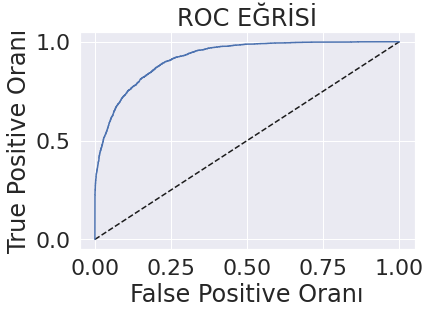

In [116]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, lgbm.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_mlp, tpr_mlp)
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC EĞRİSİ')
plt.show()

## COMPARE THE RESULTS

In [117]:
results=pd.DataFrame({
    "Algorithm":["GBM","XGBoost","HGB","LightGBM"],
    "Accuracy":[gbm_accuracy_score,xgb_accuracy_score,hgb_accuracy_score,lgbm_accuracy_score],
    "Train Score":[gbm_train_score,xgb_train_score,hgb_train_score,lgbm_train_score],
    "f1_Score":[gbm_f1_score,xgb_f1_score,hgb_f1_score,lgbm_f1_score],
     "Recall_Score":[gbm_recall_score,xgb_recall_score,hgb_recall_score,lgbm_recall_score],
      "Precision_Score":[gbm_precision_score,xgb_precision_score,hgb_precision_score,lgbm_precision_score]})

results.sort_values(ascending=False,by="Accuracy")

,Algorithm,Accuracy,Train Score,f1_Score,Recall_Score,Precision_Score
2,HGB,0.869248,0.893532,0.708871,0.666928,0.756444
3,LightGBM,0.868313,0.891689,0.706300,0.663401,0.755129
1,XGBoost,0.865881,0.909057,0.700501,0.657132,0.750000
0,GBM,0.862888,0.871694,0.680888,0.612853,0.765916


## UNDERSAMPLING BECAUSE OF UNBALANCED DATA

In [118]:
random_majority_indices=np.random.choice(df_new[df_new["income"]==0].index,
                                        len(df_new[df_new["income"]==1]),
                                        replace=False)

In [119]:
minority_class_indices=df_new[df_new["income"]==1].index
print(minority_class_indices)

Int64Index([    7,     9,    10,    11,    12,    13,    14,    15,    16,
               17,
            ...
            32518, 32522, 32533, 32535, 32536, 32539, 32541, 32547, 32555,
            32558],
           dtype='int64', length=7812)


In [120]:
under_sample_indices=np.concatenate([minority_class_indices,random_majority_indices])

In [121]:
under_sample=df_new.loc[under_sample_indices]

In [122]:
X=under_sample.drop(columns=["income"],axis=1)
X["educational-num"]=X["educational-num"].astype("int")
y=under_sample["income"]

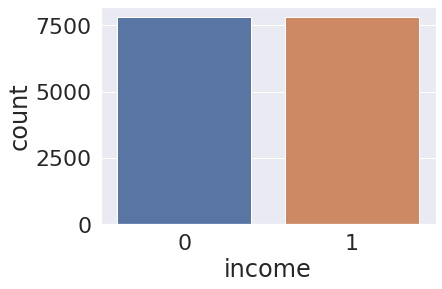

In [123]:
sns.countplot(x="income",data=under_sample)

### GBM MODEL AFTER UNDERSAMPLING

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42) 
gbm=GradientBoostingClassifier()
gbm_model=gbm.fit(X_train,y_train)
y_pred=gbm_model.predict(X_test)

print("GBM  Accuracy Score :",accuracy_score(y_test,y_pred))
print("GBM  Train Score:",    gbm_model.score(X_train,y_train))
print("GBM  f1 score:",       f1_score(y_test,y_pred))

gbm_train_score=gbm_model.score(X_train,y_train)
gbm_accuracy_score=accuracy_score(y_test,y_pred)
gbm_f1_score=f1_score(y_test,y_pred)
gbm_recall_score=recall_score(y_test,y_pred)
gbm_precision_score=precision_score(y_test,y_pred)

GBM  Accuracy Score : 0.8328161365399535
GBM  Train Score: 0.8436186473060756
GBM  f1 score: 0.8362462006079027


### XGBOOST  AFTER UNDERSAMPLING

In [125]:
xgb=XGBClassifier(seed=42)
xgb_model=xgb.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
print("XGBoost  Accuracy Score :",accuracy_score(y_test,y_pred))
print("XGBoost  Train Score:",xgb_model.score(X_train,y_train))
print("XGBoost  f1 score:",f1_score(y_test,y_pred))

xgb_train_score=xgb_model.score(X_train,y_train)
xgb_accuracy_score=accuracy_score(y_test,y_pred)
xgb_f1_score=f1_score(y_test,y_pred)
xgb_recall_score=recall_score(y_test,y_pred)
xgb_precision_score=precision_score(y_test,y_pred)

XGBoost  Accuracy Score : 0.8405740884406516
XGBoost  Train Score: 0.9055215896064196
XGBoost  f1 score: 0.8440819423368741


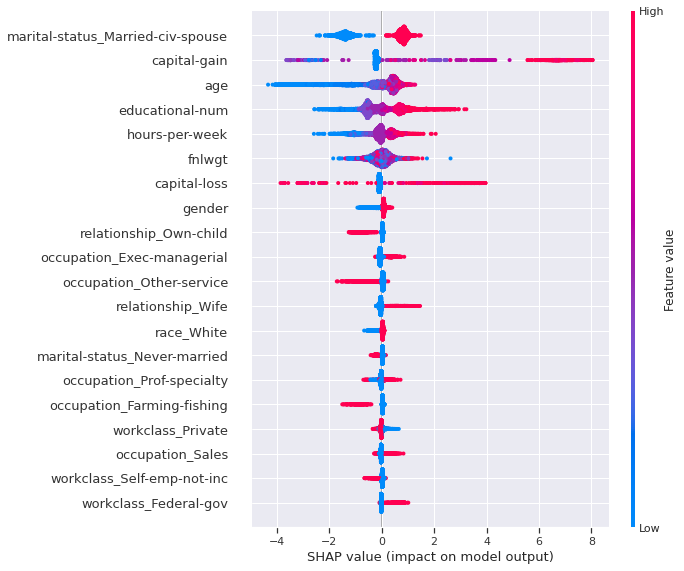

In [126]:
xgb_explainer = shap.TreeExplainer(xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_test)
shap.summary_plot(xgb_shap_values, X_test)

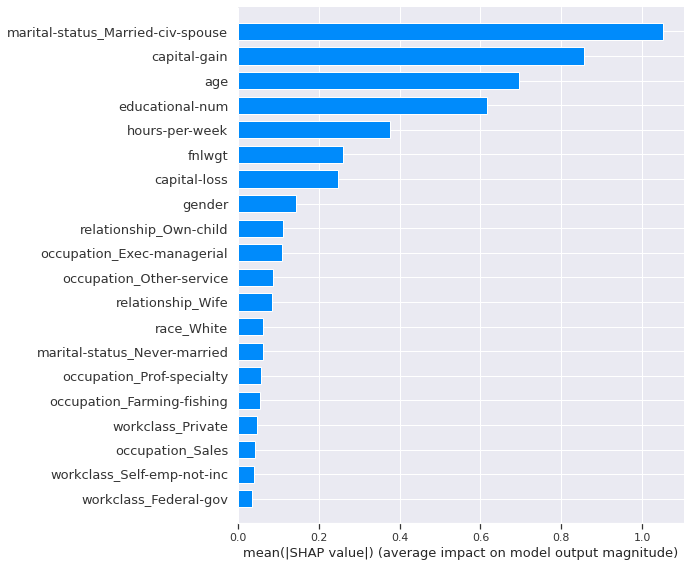

In [127]:
shap.summary_plot(xgb_shap_values,X_test,  plot_type="bar")

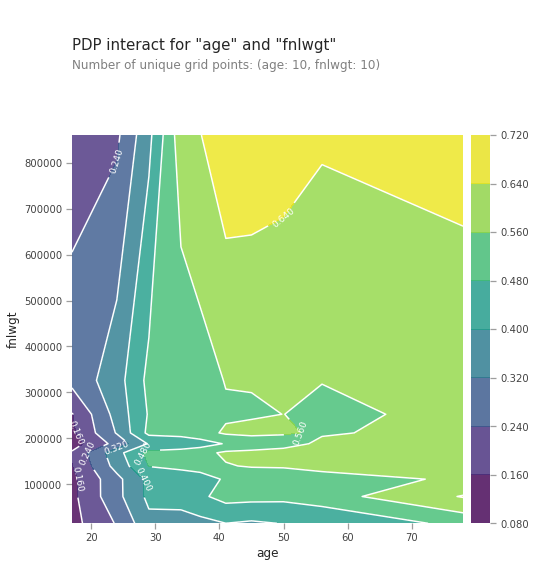

In [128]:
features_to_plot = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
inter1  =  pdp.pdp_interact(model=xgb_model, dataset=X_test, model_features=X_test.columns, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

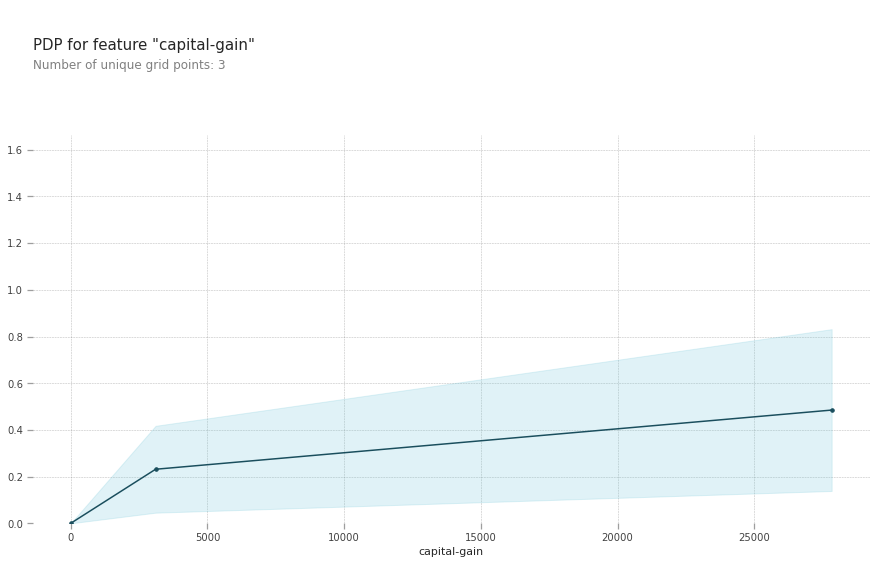

In [129]:
feature_to_plot = 'capital-gain'
pdp_dist = pdp.pdp_isolate(model=xgb_model, dataset=X_test, model_features=X_test.columns, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

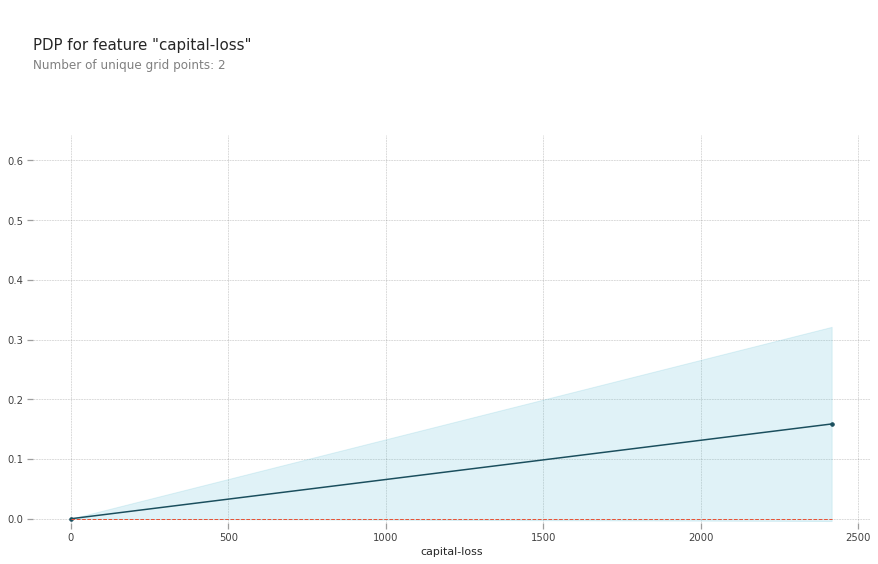

In [130]:
feature_to_plot = 'capital-loss'
pdp_dist = pdp.pdp_isolate(model=xgb_model, dataset=X_test, model_features=X_test.columns, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

### HGB AFTER UNDERSAMPLING

In [131]:

hgb=HistGradientBoostingClassifier(random_state=42,)
hgb_model=hgb.fit(X_train,y_train)
y_pred=hgb_model.predict(X_test)
print("Histogram Based Boosting  Accuracy Score:",accuracy_score(y_test,y_pred))
print("Histogram Based Boosting  Train Score:",hgb_model.score(X_train,y_train))
print("Histogram Based Boosting  f1 score:",f1_score(y_test,y_pred))

hgb_train_score=hgb_model.score(X_train,y_train)
hgb_accuracy_score=accuracy_score(y_test,y_pred)
hgb_f1_score=f1_score(y_test,y_pred)
hgb_recall_score=recall_score(y_test,y_pred)
hgb_precision_score=precision_score(y_test,y_pred)

Histogram Based Boosting  Accuracy Score: 0.8444530643910008
Histogram Based Boosting  Train Score: 0.8771494077187619
Histogram Based Boosting  f1 score: 0.8478755690440061


### LGBM AFTER UNDERSAMPLING

In [132]:
lgbm=LGBMClassifier(random_state=42)
lgbm_model=lgbm.fit(X_train,y_train)
y_pred=lgbm_model.predict(X_test)

print("LightGBM için Accuracy Score:",accuracy_score(y_test,y_pred))
print("LightGBM için Train Score:",lgbm_model.score(X_train,y_train))
print("LightGBM için f1 score:",f1_score(y_test,y_pred))

lgbm_train_score=lgbm_model.score(X_train,y_train)
lgbm_accuracy_score=accuracy_score(y_test,y_pred)
lgbm_f1_score=f1_score(y_test,y_pred)
lgbm_recall_score=recall_score(y_test,y_pred)
lgbm_precision_score=precision_score(y_test,y_pred)

LightGBM için Accuracy Score: 0.839410395655547
LightGBM için Train Score: 0.8788689338937715
LightGBM için f1 score: 0.8427649069502469


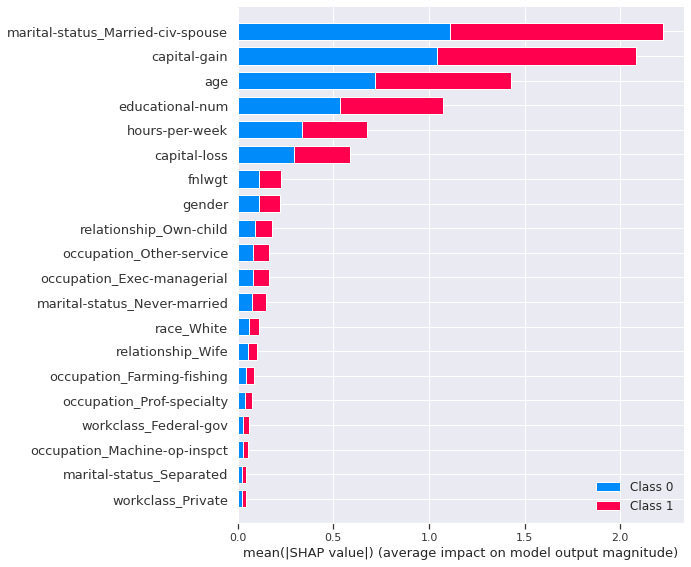

In [133]:
lgb_explainer = shap.TreeExplainer(lgbm_model)
lgb_shap_values = lgb_explainer.shap_values(X_test)
shap.summary_plot(lgb_shap_values, X_test)

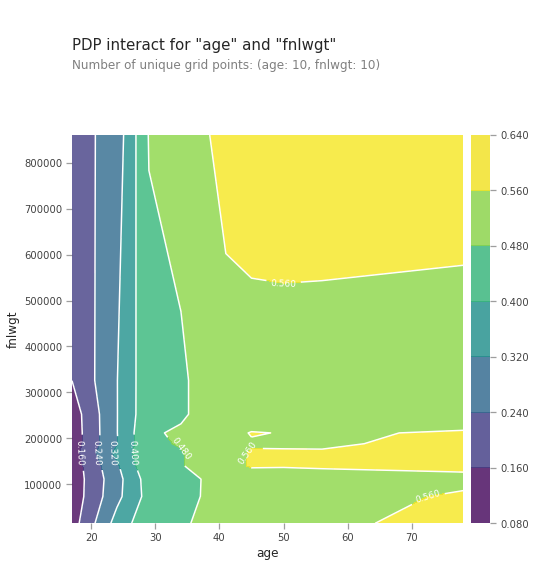

In [134]:
features_to_plot = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
inter1  =  pdp.pdp_interact(model=lgbm_model, dataset=X_test, model_features=X_test.columns, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

### RESULTS  AFTER  UNDERSAMPLING

In [135]:
results=pd.DataFrame({
    "Algorithm":["GBM","XGBoost","HGB","LightGBM"],
    "Accuracy":[gbm_accuracy_score,xgb_accuracy_score,hgb_accuracy_score,lgbm_accuracy_score],
    "Train Score":[gbm_train_score,xgb_train_score,hgb_train_score,lgbm_train_score],
    "f1_Score":[gbm_f1_score,xgb_f1_score,hgb_f1_score,lgbm_f1_score],
     "Recall_Score":[gbm_recall_score,xgb_recall_score,hgb_recall_score,lgbm_recall_score],
      "Precision_Score":[gbm_precision_score,xgb_precision_score,hgb_precision_score,lgbm_precision_score]})

results.sort_values(ascending=False,by="Accuracy")

,Algorithm,Accuracy,Train Score,f1_Score,Recall_Score,Precision_Score
2,HGB,0.844453,0.877149,0.847876,0.865608,0.830855
1,XGBoost,0.840574,0.905522,0.844082,0.861735,0.827138
3,LightGBM,0.839410,0.878869,0.842765,0.859411,0.826751
0,GBM,0.832816,0.843619,0.836246,0.852440,0.820656
